<a href="https://colab.research.google.com/github/sparshba/EMPLOYEE-ATTRITION/blob/main/Employee__ATTRITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install --use-deprecated=legacy-resolver pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 3.5 MB/s 
  Attempting uninstall: h11
    Found existing installation: h11 0.13.0
    Uninstalling h11-0.13.0:
      Successfully uninstalled h11-0.13.0


In [33]:
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from pycaret.classification import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
URL='https://raw.githubusercontent.com/sparshba/EMPLOYEE-ATTRITION/main/Employee-turnover.csv'
df=pd.read_csv(URL,encoding='unicode_escape')

In [36]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [37]:
print(df.shape)

(1470, 29)


In [38]:
df.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [39]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [40]:
print(type(df))
#data.columns = data.columns.str.replace('Attrition (Yes/No)', 'Attrition')

<class 'pandas.core.frame.DataFrame'>


In [41]:
attrition_count = pd.DataFrame(df['Attrition (Yes/No)'].value_counts())
attrition_count

,Attrition (Yes/No)
No,1233
Yes,237


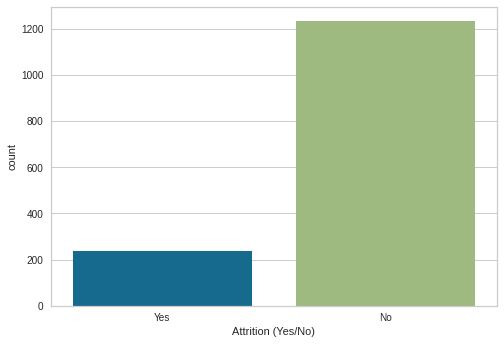

In [42]:
x=df['Attrition (Yes/No)']
sns.countplot(x)

In [43]:
#df['Attrition (Yes/No)']
df = df.replace({'Attrition (Yes/No)': {'Yes': 1, 
                                'No': 0}})
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,0


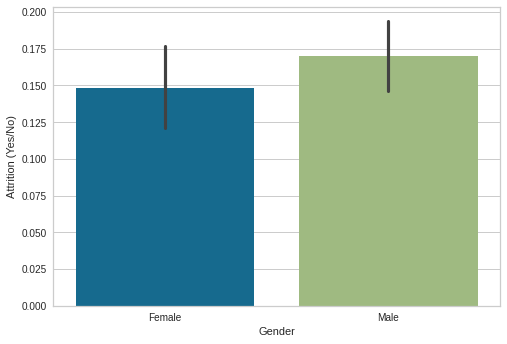

In [44]:
sns.barplot(x='Gender',y='Attrition (Yes/No)',data=df)

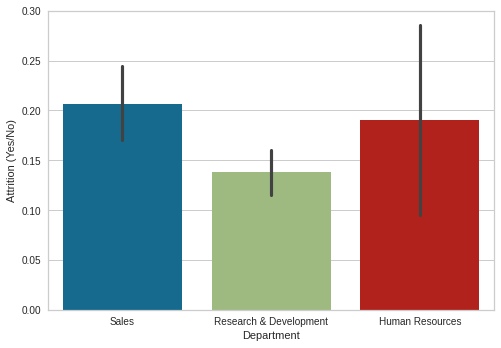

In [45]:
sns.barplot(x='Department',y='Attrition (Yes/No)',data=df)

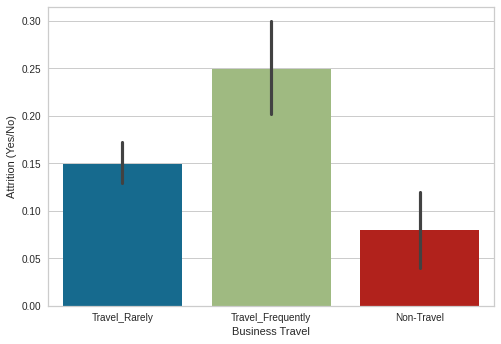

In [46]:
sns.barplot(x='Business Travel',y='Attrition (Yes/No)',data=df)

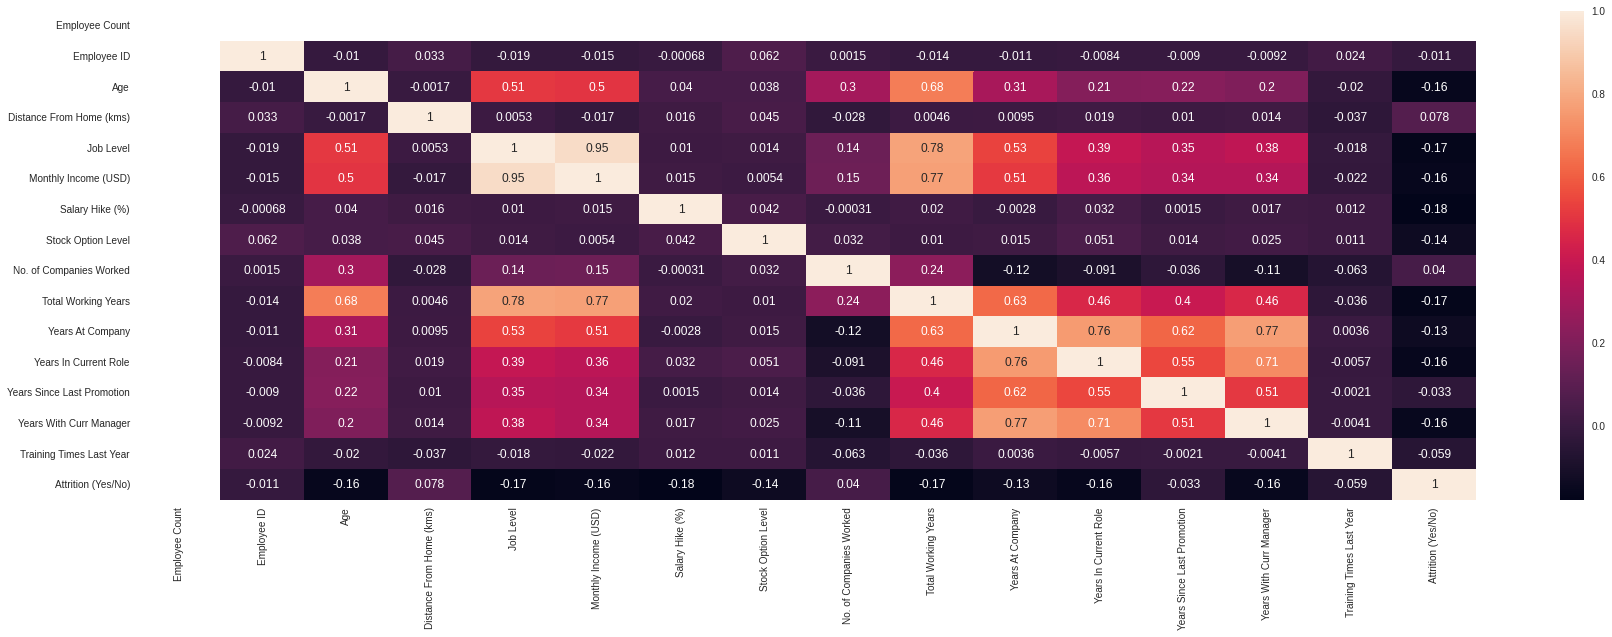

In [47]:
plt.figure(figsize = (30,9))
sns.heatmap(df.corr(),annot=True)

In [48]:
df.drop(['Age','Job Level'],axis=1)

,Employee Count,Employee ID,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,1,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,2,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,3,...,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,2,...,6,2,2,2,2,Low,3,Better,Very High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,Male,Married,College,Medical,Travel_Frequently,23,...,17,5,2,0,3,High,3,Better,High,0
1466,1,2062,Research & Development,Healthcare Representative,Male,Married,Below College,Medical,Travel_Rarely,6,...,9,7,7,1,7,Very High,5,Better,Low,0
1467,1,2064,Research & Development,Manufacturing Director,Male,Married,Bachelor,Life Sciences,Travel_Rarely,4,...,6,6,2,0,3,Medium,0,Better,Medium,0
1468,1,2065,Sales,Sales Executive,Male,Married,Bachelor,Medical,Travel_Frequently,2,...,17,9,6,0,8,Very High,3,Good,Very High,0


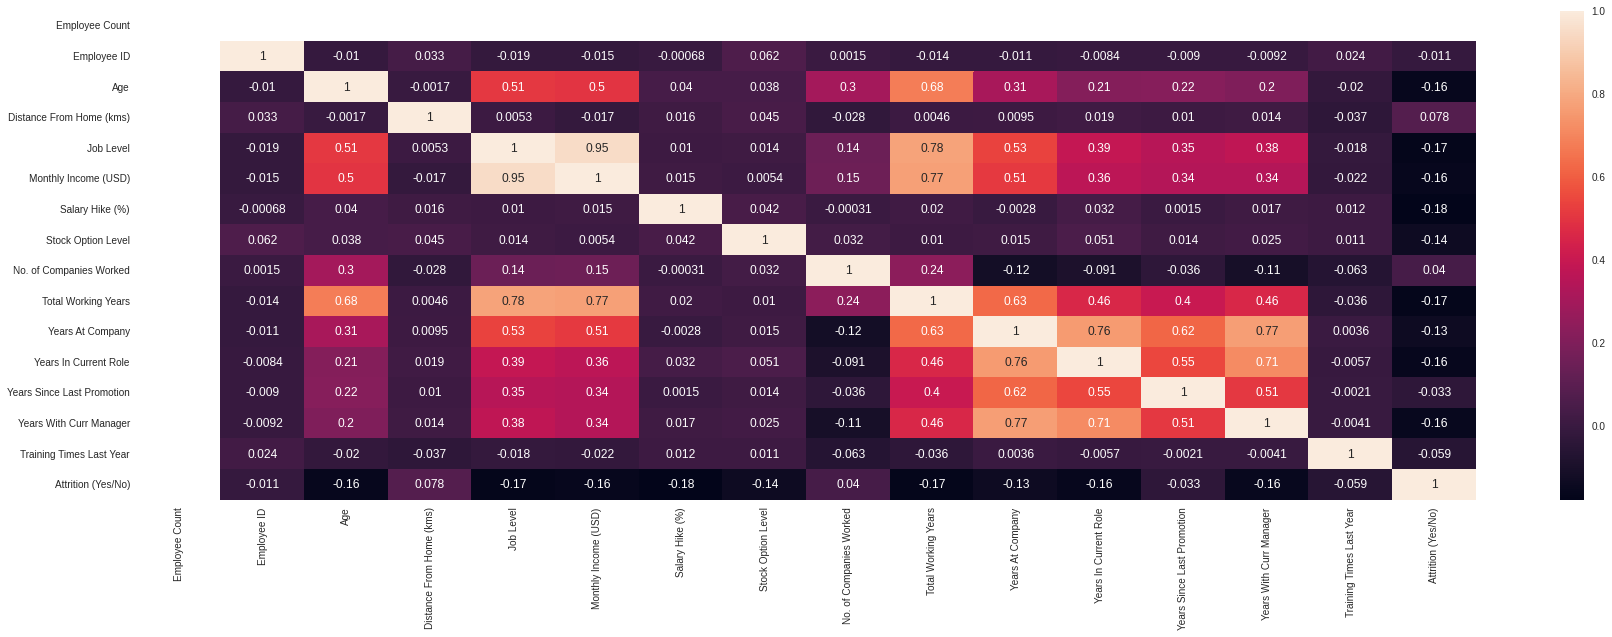

In [49]:
plt.figure(figsize = (30,9))
sns.heatmap(df.corr(),annot=True)

In [50]:
cat_col = df.select_dtypes(exclude=np.number).columns
num_col = df.select_dtypes(include=np.number).columns
for i in cat_col:
    print(f'\n========= {i} \n')
    print(df[i].value_counts())


========= Department 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

========= Job Role 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

========= Gender 

Male      882
Female    588
Name: Gender, dtype: int64

========= Marital Status 

Married     673
Single      470
Divorced    327
Name: Marital Status, dtype: int64

========= Education 

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

========= Education Field 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resource

In [51]:
#Creating of Dummy variables for categorial variables
encoded_cat_col = pd.get_dummies(df[cat_col], drop_first=True)
final_model = pd.concat([df[num_col],encoded_cat_col],axis=1)
final_model.columns

Index(['Employee Count', 'Employee ID', 'Age', 'Distance From Home (kms)',
       'Job Level', 'Monthly Income (USD)', 'Salary Hike (%)',
       'Stock Option Level', 'No. of Companies Worked', 'Total Working Years',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Training Times Last Year', 'Attrition (Yes/No)',
       'Department_Research & Development', 'Department_Sales',
       'Job Role_Human Resources', 'Job Role_Laboratory Technician',
       'Job Role_Manager', 'Job Role_Manufacturing Director',
       'Job Role_Research Director', 'Job Role_Research Scientist',
       'Job Role_Sales Executive', 'Job Role_Sales Representative',
       'Gender_Male', 'Marital Status_Married', 'Marital Status_Single',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'Education Field_Life Sciences',
       'Education Field_Marketing', 'Education Field_Medical',
       '

In [52]:
final_model.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High
0,1,1,41,1,2,5993,11,0,2,8,...,1,0,1,0,0,0,0,1,0,0
1,1,2,49,8,2,5130,23,1,1,10,...,0,0,0,0,0,1,0,0,0,1
2,1,4,37,2,1,2090,15,0,6,7,...,1,1,0,0,0,0,0,0,1,0
3,1,5,33,3,1,2909,11,0,1,8,...,1,0,0,1,0,1,0,0,0,0
4,1,7,27,2,1,3468,12,1,9,6,...,0,1,0,0,0,1,0,0,0,1


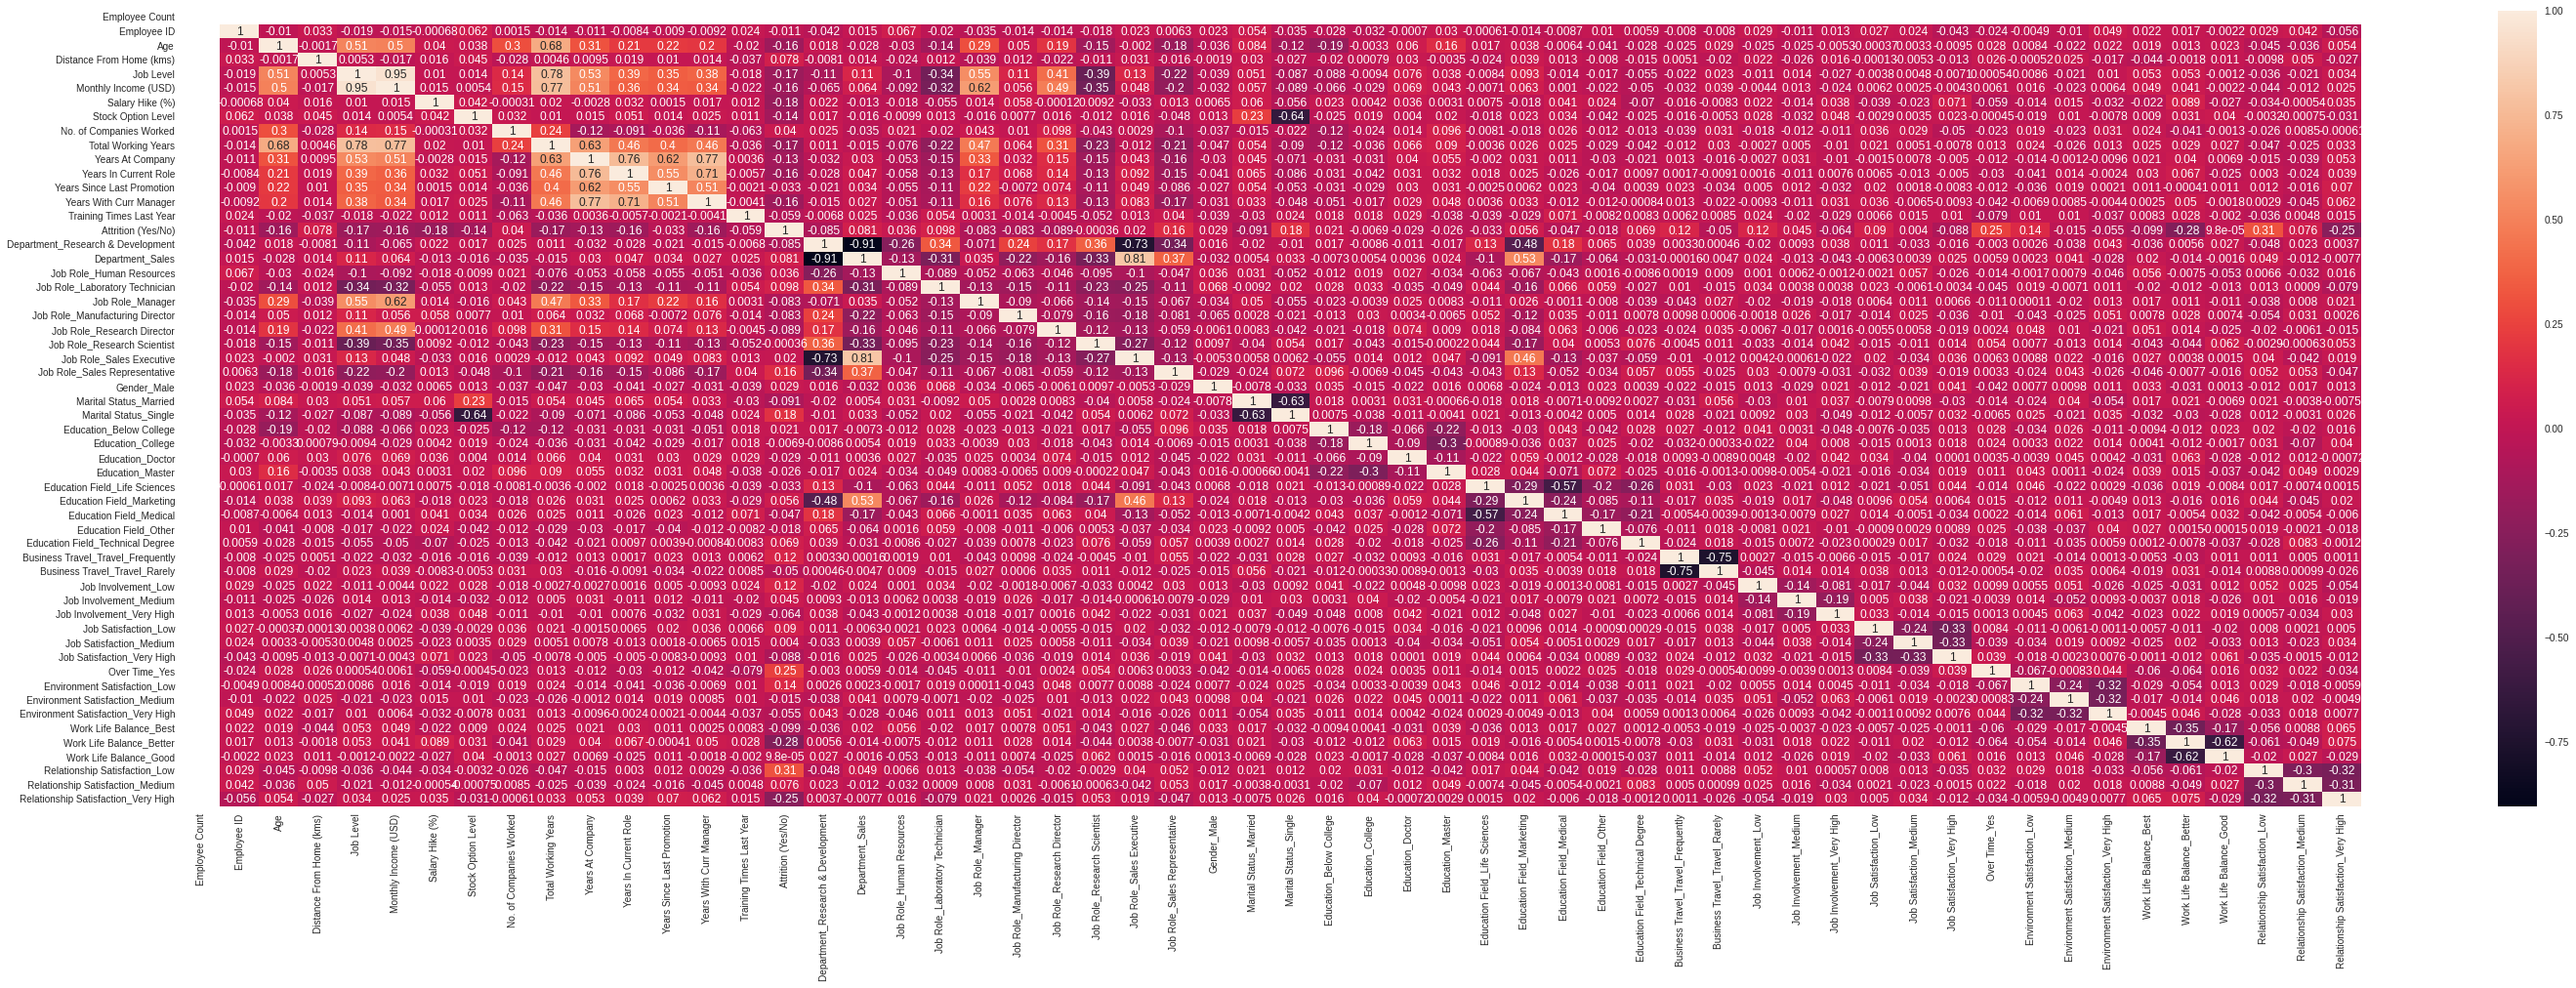

In [53]:
plt.figure(figsize = (50,15))
sns.heatmap(final_model.corr(),annot=True)

<h1>MODEL BUILDING</h1>

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x  = final_model.drop(['Attrition (Yes/No)'], axis = 1)
y = df['Attrition (Yes/No)']

In [88]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [89]:
x_train.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High
338,1,456,30,5,2,6118,13,3,1,10,...,0,0,0,1,0,1,0,0,0,0
363,1,485,33,5,1,2851,13,0,1,1,...,1,0,0,1,0,0,0,0,1,0
759,1,1049,45,24,1,2177,16,0,1,6,...,0,0,1,0,0,1,0,1,0,0
793,1,1102,28,15,1,2207,16,1,1,4,...,0,1,0,0,0,0,1,0,0,1
581,1,806,30,1,1,3833,21,2,3,7,...,0,0,0,1,0,1,0,0,0,0


<h2>RANDOM FOREST</h2>

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini')


In [98]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
rf.score(x_train, y_train)

1.0

<h2>Predicting for x_test</h2>

In [101]:
pred = rf.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test, pred)

0.8843537414965986

<h1>PYCARET</h1>

In [72]:
x_train['Attrition (Yes/No)']=y_train
x_train.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No)
338,1,456,30,5,2,6118,13,3,1,10,...,0,0,1,0,1,0,0,0,0,0
363,1,485,33,5,1,2851,13,0,1,1,...,0,0,1,0,0,0,0,1,0,1
759,1,1049,45,24,1,2177,16,0,1,6,...,0,1,0,0,1,0,1,0,0,0
793,1,1102,28,15,1,2207,16,1,1,4,...,1,0,0,0,0,1,0,0,1,0
581,1,806,30,1,1,3833,21,2,3,7,...,0,0,1,0,1,0,0,0,0,0


In [79]:
x_test['Attrition (Yes/No)']=y_test
x_test.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No)
442,1,592,36,10,3,9980,14,0,1,10,...,0,1,0,0,0,1,0,0,1,0
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,0,1,0,1,0,0,0,1,0
981,1,1380,35,18,2,4614,18,1,0,5,...,0,0,1,0,0,1,1,0,0,1
785,1,1092,40,20,3,10322,20,1,4,14,...,1,0,0,0,1,0,0,0,1,0
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,0,1,0,0,1,0,1,0,1


In [74]:
s=setup(x_train,target='Attrition (Yes/No)')

,Description,Value
0,session_id,2514
1,Target,Attrition (Yes/No)
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1029, 56)"
5,Missing Values,False
6,Numeric Features,46
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model=compare_models()

In [ ]:
evaluate_model(best_model)

In [136]:
predictions = predict_model(best_model,data=x_test)
predictions

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Label
442,1,592,36,10,3,9980,14,0,1,10,...,0,1,0,0,0,1,0,0,1,0
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,0,1,0,1,0,0,0,1,0
981,1,1380,35,18,2,4614,18,1,0,5,...,0,0,1,0,0,1,1,0,0,0
785,1,1092,40,20,3,10322,20,1,4,14,...,1,0,0,0,1,0,0,0,1,0
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,1,0,0,0,1,0,1,0,0,0
399,1,530,31,1,1,2218,12,1,1,4,...,0,0,1,0,1,0,0,0,0,0
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,0,1,0,0,0,0,0
406,1,543,52,3,3,7969,14,0,2,28,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
print(predictions['Score'].mean())

In [137]:
predictions = predict_model(create_model('rf'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8611,0.9113,0.2727,0.6000,0.3750,0.3090,0.3396
1,0.9028,0.8033,0.3636,1.0000,0.5333,0.4919,0.5711
2,0.8750,0.8964,0.1818,1.0000,0.3077,0.2735,0.3980
3,0.8889,0.9776,0.2727,1.0000,0.4286,0.3885,0.4910
4,0.8750,0.9001,0.2727,0.7500,0.4000,0.3468,0.4026
5,0.8889,0.9232,0.3636,0.8000,0.5000,0.4472,0.4914
6,0.8750,0.8063,0.2500,1.0000,0.4000,0.3571,0.4663
7,0.8611,0.8958,0.2500,0.7500,0.3750,0.3182,0.3796
8,0.8611,0.9403,0.1667,1.0000,0.2857,0.2500,0.3780


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,1,0,0,0,1,0,0,1,0,0.95
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,1,0,1,0,0,0,1,0,0.98
981,1,1380,35,18,2,4614,18,1,0,5,...,0,1,0,0,1,1,0,0,0,0.74
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,0,1,0,0,0,1,0,0.92
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,1,0,0,1,0,1,0,1,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,0,1,0,1,0,0,0,0.86
399,1,530,31,1,1,2218,12,1,1,4,...,0,1,0,1,0,0,0,0,0,0.95
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,1,0,0,0,0,0,0.87
406,1,543,52,3,3,7969,14,0,2,28,...,0,1,0,1,0,0,0,0,0,0.92


In [138]:
print(predictions['Score'].mean())

0.8508616780045352


In [139]:
predictions = predict_model(create_model('lr'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9583,0.8182,0.9000,0.8571,0.8328,0.8341
1,0.9028,0.8882,0.5455,0.7500,0.6316,0.5772,0.5869
2,0.9444,0.9732,0.9091,0.7692,0.8333,0.8003,0.8043
3,0.9444,1.0000,0.6364,1.0000,0.7778,0.7478,0.7728
4,0.9028,0.9180,0.5455,0.7500,0.6316,0.5772,0.5869
5,0.9306,0.9583,0.8182,0.7500,0.7826,0.7414,0.7424
6,0.8611,0.8639,0.5000,0.6000,0.5455,0.4643,0.4670
7,0.9028,0.9403,0.6667,0.7273,0.6957,0.6379,0.6388
8,0.8750,0.8667,0.5000,0.6667,0.5714,0.5000,0.5071


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,1,0,0,0,1,0,0,1,0,0.9976
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,1,0,1,0,0,0,1,0,0.9996
981,1,1380,35,18,2,4614,18,1,0,5,...,0,1,0,0,1,1,0,0,1,0.7753
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,0,1,0,0,0,1,0,0.9969
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,1,0,0,1,0,1,0,1,0.6218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,0,1,0,1,0,0,0,0.9801
399,1,530,31,1,1,2218,12,1,1,4,...,0,1,0,1,0,0,0,0,0,0.9912
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,1,0,0,0,0,0,0.9903
406,1,543,52,3,3,7969,14,0,2,28,...,0,1,0,1,0,0,0,0,0,0.9980


In [140]:
print(predictions['Score'].mean())

0.923936507936508


In [141]:
predictions = predict_model(create_model('knn'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.6595,0.1818,0.3333,0.2353,0.1429,0.1513
1,0.8750,0.6982,0.1818,1.0000,0.3077,0.2735,0.3980
2,0.8750,0.7265,0.2727,0.7500,0.4000,0.3468,0.4026
3,0.8611,0.6162,0.0909,1.0000,0.1667,0.1449,0.2795
4,0.8472,0.5939,0.1818,0.5000,0.2667,0.2016,0.2341
5,0.7361,0.4419,0.0000,0.0000,0.0000,-0.1477,-0.1501
6,0.7917,0.5250,0.0000,0.0000,0.0000,-0.0714,-0.0933
7,0.7778,0.5403,0.1667,0.2500,0.2000,0.0769,0.0791
8,0.8194,0.6181,0.1667,0.4000,0.2353,0.1522,0.1710


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,1,0,0,0,1,0,0,1,0,0.8
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,1,0,1,0,0,0,1,0,0.8
981,1,1380,35,18,2,4614,18,1,0,5,...,0,1,0,0,1,1,0,0,0,1.0
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,0,1,0,0,0,1,0,1.0
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,1,0,0,1,0,1,0,1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,0,1,0,1,0,0,0,0.6
399,1,530,31,1,1,2218,12,1,1,4,...,0,1,0,1,0,0,0,0,1,0.6
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,1,0,0,0,0,0,1.0
406,1,543,52,3,3,7969,14,0,2,28,...,0,1,0,1,0,0,0,0,0,0.6
